In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
input_values = dataset.iloc[:,1:2]

In [5]:
output_values = dataset.iloc[:,2:3]

### Plotting

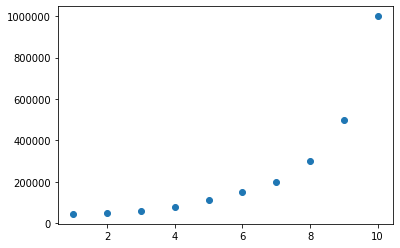

In [6]:
plt.plot(input_values , output_values , 'o')
plt.show()

<p>We won't split the data here due to lack of values in the dataset</p>

### Initial Model

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
regressor = LinearRegression()

In [9]:
regressor.fit(input_values , output_values)

LinearRegression()

In [10]:
regressor.intercept_

array([-195333.33333333])

In [11]:
regressor.coef_

array([[80878.78787879]])

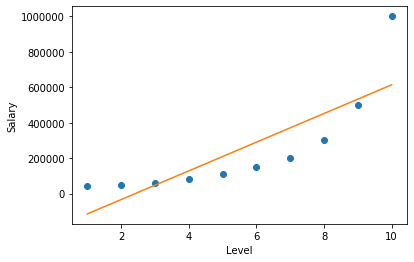

In [12]:
plt.plot(input_values , output_values , 'o')
plt.plot(input_values , regressor.predict(input_values))
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

<p>Obviously , this won't give us the best fit line , since the linear model class only consitis of linear terms . <br/>
Hence , to introduce polynomial or squared terms we use PolyNomialFeatures</p>

### Introducing Polynomial Features

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly_reg = PolynomialFeatures(degree = 3)  # the more the degree (wrt dataset) , can lead to overfitting , 
                                           # giving less error in training set and more on validation set

In [15]:
poly_matrix = poly_reg.fit_transform(input_values)

In [16]:
pd.DataFrame(poly_matrix)

,0,1,2,3
0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0
2,1.0,3.0,9.0,27.0
3,1.0,4.0,16.0,64.0
4,1.0,5.0,25.0,125.0
5,1.0,6.0,36.0,216.0
6,1.0,7.0,49.0,343.0
7,1.0,8.0,64.0,512.0
8,1.0,9.0,81.0,729.0
9,1.0,10.0,100.0,1000.0


In [17]:
pd.DataFrame(input_values)

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


### Final Model

In [18]:
reg = LinearRegression()

In [19]:
reg.fit(poly_matrix , output_values)

LinearRegression()

In [20]:
reg.coef_

array([[     0.        , 180664.33566432, -48548.95104895,
          4120.04662005]])

In [21]:
reg.intercept_

array([-121333.33333331])

### Comparing And Plotting

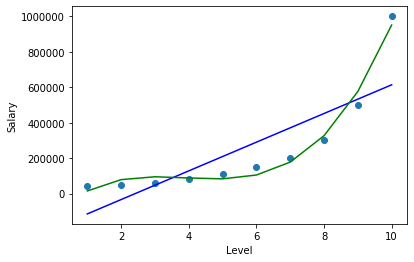

In [22]:
plt.plot(input_values , output_values , 'o')
plt.plot(input_values , regressor.predict(input_values) , color = 'blue')
plt.plot(input_values , reg.predict(poly_matrix) , color = 'green')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### Predicting

#### Inital Model ( Straight Line )

In [23]:
regressor.predict(np.array([10]).reshape(-1,1)) # preeicted value
                                                # actual value : 1000000

array([[613454.54545455]])

#### Final Model ( Polynomial )

In [24]:
reg.predict(poly_reg.fit_transform(np.array([10]).reshape(-1,1))) # predicted value
                                                                  # actual value : 950461.53

array([[950461.53846153]])